https://github.com/mrdbourke/zero-to-mastery-ml

# 🐶 end-to-end Multi-class Dog breed Classification
this notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub

## 1. Problem

Identifying the breed of a dog given an image of a dog. 
When I'm sitting at the cafe and I take a photo of a dog, I want to know that breed of dog it is.

## 2. Data 

The data we're using is from Kaggle's dog breed identification competition.

## 3. Evaluate

The evaluation is a file with predicitno probabilities for each dog breed of each test image.

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.

* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10000+ images in the training set (these images have labels)
* There are around 10000+ images in the test set (these images have no labels, because we'll want to predict them)


### Get workspace ready
* Import TF into Collab
* Import Tensorflow HUB
* Make sure we're using a GPU

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version: ", tf.__version__)
print("TF HUB version: ", hub.__version__)
# Check for GPU availability
print("GPU: ", tf.config.list_physical_devices('GPU'))

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
TF version:  2.5.0-rc2
TF HUB version:  0.12.0
GPU:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Getting our data ready (turning into Tensors)
With all ML models, our data gas to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representation).
Let's start by accessing our data and checking out the labels

In [2]:
# Checkout the labels of our data
%matplotlib inline
import pandas as pd
import numpy as np
labels_csv = pd.read_csv('./labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

# How many images are there of each breed?
print(f"\nBreed count: {labels_csv['breed'].count()}")

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     3df5d07bc814c7d1805ea4842ead9819  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

Breed count: 10222


<AxesSubplot:>

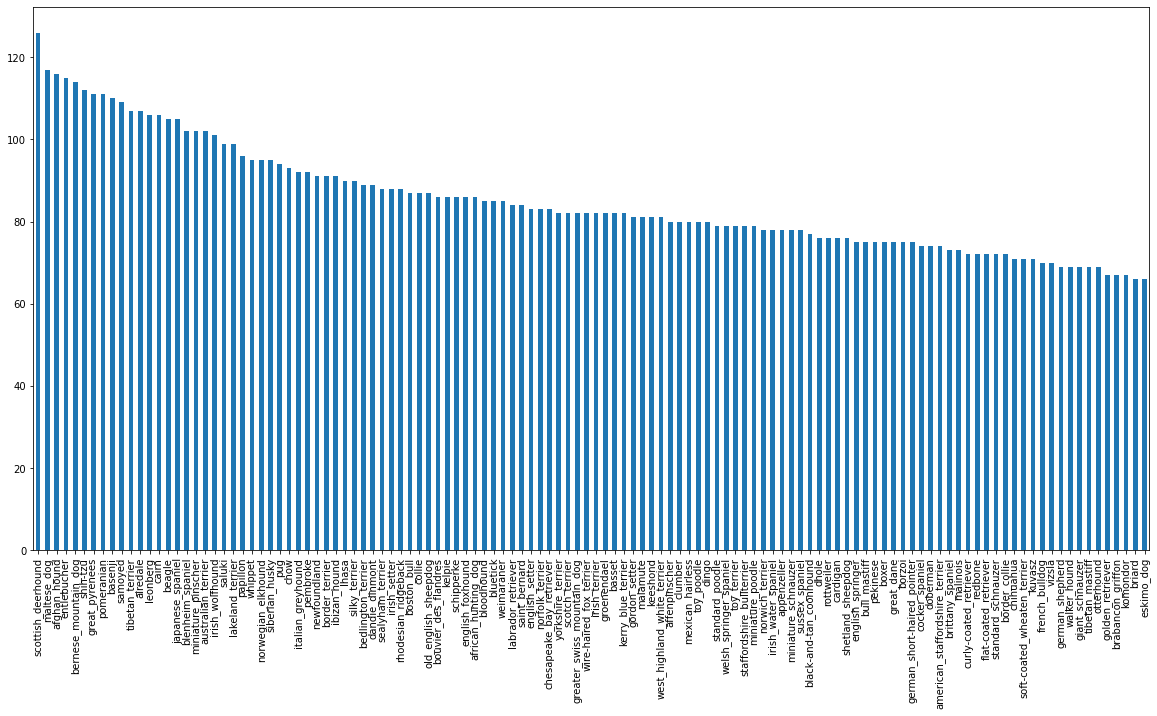

In [3]:
# How many images are there of each breed?
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [4]:
labels_csv['breed'].value_counts().median()

82.0

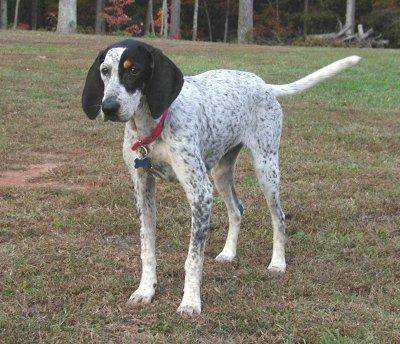

In [5]:
# Let's view an image
from IPython.display import Image
Image('./train/00214f311d5d2247d5dfe4fe24b2303d.jpg')

### Getting images and their labels

Let's get a list of all of our image file pathnames.

In [6]:
# Create pathnames from image ID's
filenames = ['./train/' + fname + '.jpg' for fname in labels_csv['id']]
filenames[:10]

['./train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 './train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 './train/001cdf01b096e06d78e9e5112d419397.jpg',
 './train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 './train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 './train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 './train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 './train/002a283a315af96eaea0e28e7163b21b.jpg',
 './train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 './train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [7]:
# Check whether number of filenams matches number of actual image files
import os
len(os.listdir('./train/')) == len(filenames)

True

In [8]:
labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels) # same thing
len(labels)

10222

In [9]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
    print("Number of labels matches number of filenames!")
else:
    print("Number of labels doest not match number of filenames, check data directories!")

Number of labels matches number of filenames!


In [10]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [11]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [12]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [13]:
# Example: turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # thee will be a 1 where the sample label occurs

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validatoin set
Since the dataset from Kaggle doesn't come with a validation set, we're going to crete our own.

In [14]:
# Setup X & y variables
X = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increase as needed.

In [15]:
# Set number of images to use for experimenting
NUM_IMAGES = 2000 #@param {type:'slider', min:1000, max:10000, step:1000}


In [16]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(1600, 1600, 400, 400)

## Preprocessing Images (turning images into Tensors)
o preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, 'image'
3. Turn our 'image' (a jpg) into Tensors
4. Resize the 'image' to be a shape of (224, 224)
5. Return the modefied 'image'

Before we do' let's see what importing an image looks like.

In [17]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [18]:
# Turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like a Tensor, let's make a function to preproces them.

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, 'image'
3. Turn our 'image' (a jpg) into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1).
5. Resize the 'image' to be a shape of (224, 224)
6. Return the modefied 'image'

In [19]:
# Define image size
IMG_SIZE = 224

# Create a function for preporecessing images
def process_image(image_path):
  '''
  Taken an image file path and turns the image into  a Tensor.
  '''
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Read, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values (normalization)
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to proces 10000+ in one go... they all might not fit into memory.

So that's why we do about 32 images (batch size) at a time (you can manually adjust the batch size if need be).

In order to use TF effectively, we need our data in the form of Tensor tuples which look like this:
'(image, label)'.

In [20]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  '''
  Takes an image file path name and the assosciated label, processed the image and returns a typle of (image, label).
  '''
  image = process_image(image_path)
  return image, label

In [21]:
# Demo of above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: '(image, label)', let's make a function to turn all of our data ('X' & 'y') into batches!

In [22]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's trainning data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  '''

  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths, no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # Filepaths
                                              tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor functions is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, labels) tuples (this also turns the image path int oa preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [23]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [24]:
# Check out different attributes of our data batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualising Data Batches

Our data is not in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

In [25]:
import matplotlib.pyplot as plt
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
    """
    Displays a plot of 25 images and their labels from a data batch.
    """
    # Setup the figure 
    plt.figure(figsize=(10, 10))
    # Loop through 25 (for displaying 25 images)
    for i in range(25):
        # Create subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i+1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label
        plt.title(unique_breeds[labels[i].argmax()])
        # Turn the grid lines off
        # plt.axis('off')

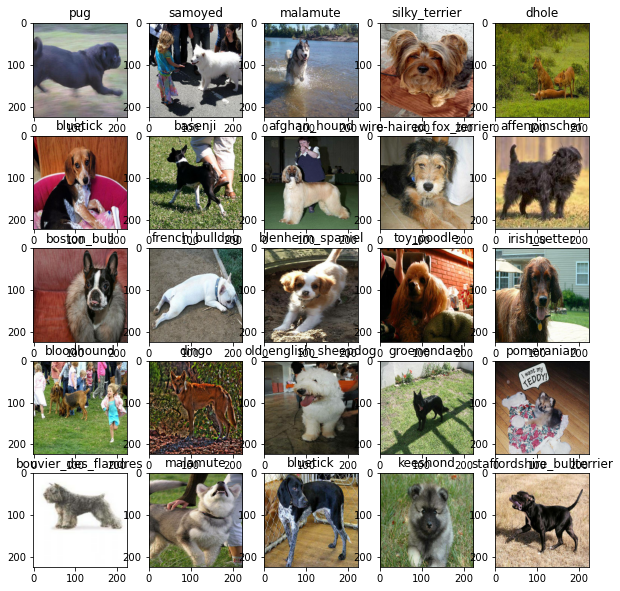

In [26]:
train_images, train_labels = next(train_data.as_numpy_iterator())
# Now let's visualize the data in a training batch
show_25_images(train_images, train_labels)

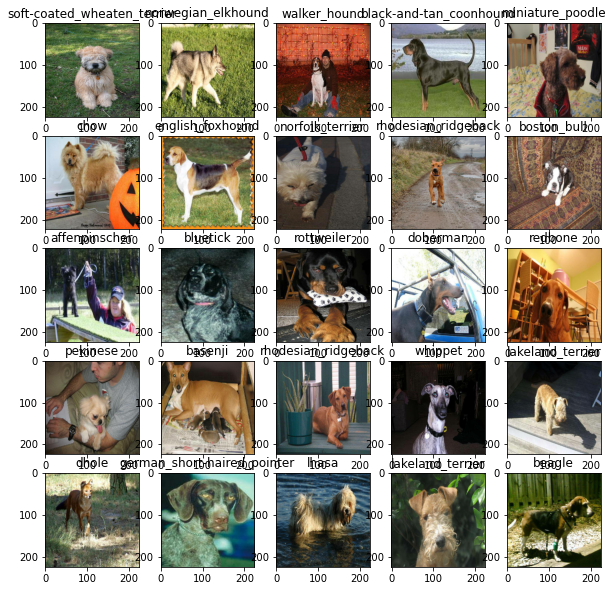

In [27]:
# Now let's visualize our validation set
val_images, val_labels = next(valid_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# Building a model

Before we build a model, there are a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model
* The URL of the model we want to use


In [28]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colur channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

### Now  we've got our inputs ,outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

P.S. all of these steps can be found here: https://www.tensorflow.org/guide/keras/sequential_model

In [29]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with: ", MODEL_URL)

    # Setup model layers
    model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL), # layer 1 (input layer)
                                tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                        activation='softmax') # Layer 2 (output layer)
                                ])
    # Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy']
    )

    # Build the model
    model.build(INPUT_SHAPE)

    return model

In [30]:
#model = create_model()
#model.summary()

## Creating callbacks

Callbaks are helper functions a model can use during training to do such things as save its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training fro too long.

### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:

1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's 'fit()' function.
3. Visualize our models training logs with the '%tensorboard' magic function (we'll do this after model training).


In [31]:
# Load TensorBoard notebook extension
#%load_ext tensorboard


In [32]:
import datetime
# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
    # Create a log directory for storing TensorBoard logs
    logdir = os.path.join("./logs",
                            # Make it so the logs tracked whenever we run an experiment
                            datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://keras.io/api/callbacks/early_stopping/



In [33]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

## Training a model (on subset of data)
Our first model is only going to train on 1000 images, to make sure everything is working.

In [34]:
NUM_EPOCHS = 100

# Let's create a function which trains a model.abs

* Create a model using 'create_model()'
* Setup a TensorBoard callback using 'create_tensorboard_callback()'
* Call the 'fit()' function on our model passing it the traiing data, validation data, number of epochs to train for  NUM_EPOCHS and the callbacks we'd like to use
* Return the model

In [35]:
# Build a functions to train and return a trained model
def train_model():
    '''
    Trains a given model and returns the trained version.
    '''
    # Create a model
    model = create_model()

    # Create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()

    # Fit the model to the data passing it the callbacks we created
    model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
    # Return the fitted model
    return model

In [36]:
# Fit the model to the data
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
50/50 [==============================] - 11s 119ms/step - loss: 3.7097 - accuracy: 0.2456 - val_loss: 1.8323 - val_accuracy: 0.5875
Epoch 2/100
50/50 [==============================] - 2s 44ms/step - loss: 0.8601 - accuracy: 0.8350 - val_loss: 1.1098 - val_accuracy: 0.7175
Epoch 3/100
50/50 [==============================] - 2s 43ms/step - loss: 0.3440 - accuracy: 0.9575 - val_loss: 0.9455 - val_accuracy: 0.7350
Epoch 4/100
50/50 [==============================] - 2s 42ms/step - loss: 0.1795 - accuracy: 0.9869 - val_loss: 0.8948 - val_accuracy: 0.7675
Epoch 5/100
50/50 [==============================] - 2s 42ms/step - loss: 0.1128 - accuracy: 0.9950 - val_loss: 0.8550 - val_accuracy: 0.7725
Epoch 6/100
50/50 [==============================] - 2s 42ms/step - loss: 0.0797 - accuracy: 0.9994 - val_loss: 0.8373 - val_accuracy: 0.7725
Epoch 7/100
50/50 [==============================] -

## Checking the TernsorBoard logs
The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and visualize its contents.

## Making and evaluating predicitons using a trained model

In [37]:
# make predictions on the validation data (not used to train on)
predictions = model.predict(valid_data, verbose=1)
predictions

13/13 [==============================] - 1s 30ms/step


array([[1.08050858e-03, 2.80763246e-02, 2.26672182e-05, ...,
        1.95515298e-04, 1.14229028e-04, 1.33230451e-05],
       [1.46378370e-04, 1.02255208e-05, 2.33840965e-05, ...,
        9.67979668e-06, 8.41818564e-06, 4.22356425e-05],
       [3.15013176e-06, 5.23820939e-03, 1.97597474e-05, ...,
        1.91372167e-02, 1.59221181e-05, 2.65620713e-07],
       ...,
       [7.92862556e-06, 2.21679598e-04, 1.04419145e-04, ...,
        3.81168647e-05, 1.02810962e-04, 1.58010196e-04],
       [8.75292826e-05, 6.33282582e-07, 2.92663526e-06, ...,
        3.56239470e-05, 1.00775185e-04, 7.66198136e-05],
       [1.47991568e-05, 3.22246378e-05, 5.85202464e-09, ...,
        4.15704676e-07, 1.32537070e-06, 1.50876396e-08]], dtype=float32)

In [38]:
predictions.shape

(400, 120)

In [39]:
# First prediction
index = 56
print(predictions[index])
print(f"max value (probability of predfiction): {np.max(predictions[index])}")
print(f"sum: {np.sum(predictions[index])}")
print(f"max index: {np.argmax(predictions[index])}")
print(f"predicited label: {unique_breeds[np.argmax(predictions[index])]}")

[2.06477198e-05 2.85611051e-04 6.15493045e-05 7.58617462e-05
 6.12450112e-03 1.70757330e-03 2.93005491e-04 7.06484076e-04
 6.76028151e-03 7.84986079e-01 1.45759323e-05 1.28969341e-03
 2.41412548e-04 5.23912013e-02 1.13024835e-04 2.58851651e-04
 4.42152639e-04 5.02675213e-03 1.27633921e-05 3.77600524e-03
 5.58519469e-06 1.18116243e-03 1.26610976e-03 3.55157645e-05
 1.08464307e-03 5.87762770e-06 3.36490666e-05 6.99895015e-03
 1.61528135e-06 1.91085730e-02 1.13157279e-04 5.90605123e-05
 2.90292664e-04 3.01846394e-05 6.42934720e-06 2.07603152e-04
 6.38388738e-05 4.04051298e-06 1.13040942e-05 1.66849873e-03
 9.19841114e-04 4.60141891e-04 2.34004157e-03 4.86572935e-05
 2.26632274e-05 2.09280197e-03 1.95282228e-05 3.59757287e-05
 1.61276257e-05 4.62049902e-05 1.06844713e-03 4.23734582e-06
 5.79474901e-04 1.76254625e-03 3.28728134e-07 3.14728750e-05
 1.60750555e-04 2.60671350e-05 4.39463402e-05 4.14918713e-06
 5.31196536e-04 4.22816910e-03 4.24503878e-06 1.11138179e-04
 1.08224749e-05 1.058065

In [40]:
# Turn prediciton probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
    """
    Turns an array of prediction probabilitiers into a label.
    """
    return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'soft-coated_wheaten_terrier'

In [41]:
valid_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

### Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predicitons on the validation images and then compare those predicitons to the validation labels (truth labels)

In [42]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
    """
    Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels.
    """
    images = []
    labels = []
    #  Loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(valid_data)
val_images[0], val_labels[0]

(array([[[0.28940946, 0.3325467 , 0.17568395],
         [0.2501433 , 0.29330748, 0.13644473],
         [0.2876167 , 0.3342017 , 0.17733893],
         ...,
         [0.5164206 , 0.5776601 , 0.33903962],
         [0.54773974, 0.6089793 , 0.3703588 ],
         [0.50159407, 0.56283355, 0.32421306]],
 
        [[0.27667817, 0.3276586 , 0.15903112],
         [0.30975384, 0.3608085 , 0.19218104],
         [0.33957785, 0.39721096, 0.22858347],
         ...,
         [0.491509  , 0.5575804 , 0.28604677],
         [0.5702347 , 0.6363061 , 0.36477253],
         [0.5313855 , 0.59745693, 0.32592332]],
 
        [[0.29069865, 0.35518688, 0.17861006],
         [0.29807582, 0.36118335, 0.18470922],
         [0.31007844, 0.37737536, 0.20058963],
         ...,
         [0.50055254, 0.56690407, 0.29036346],
         [0.5573835 , 0.623735  , 0.3471944 ],
         [0.55167574, 0.61802727, 0.34148666]],
 
        ...,
 
        [[0.24473517, 0.27916905, 0.13407102],
         [0.04194383, 0.08529994, 0.00537

In [43]:
images_ = []
labels_ = []

# loop through unbatched data
for image, label in valid_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)

images_[0], labels_[0]

(array([[[0.28940946, 0.3325467 , 0.17568395],
         [0.2501433 , 0.29330748, 0.13644473],
         [0.2876167 , 0.3342017 , 0.17733893],
         ...,
         [0.5164206 , 0.5776601 , 0.33903962],
         [0.54773974, 0.6089793 , 0.3703588 ],
         [0.50159407, 0.56283355, 0.32421306]],
 
        [[0.27667817, 0.3276586 , 0.15903112],
         [0.30975384, 0.3608085 , 0.19218104],
         [0.33957785, 0.39721096, 0.22858347],
         ...,
         [0.491509  , 0.5575804 , 0.28604677],
         [0.5702347 , 0.6363061 , 0.36477253],
         [0.5313855 , 0.59745693, 0.32592332]],
 
        [[0.29069865, 0.35518688, 0.17861006],
         [0.29807582, 0.36118335, 0.18470922],
         [0.31007844, 0.37737536, 0.20058963],
         ...,
         [0.50055254, 0.56690407, 0.29036346],
         [0.5573835 , 0.623735  , 0.3471944 ],
         [0.55167574, 0.61802727, 0.34148666]],
 
        ...,
 
        [[0.24473517, 0.27916905, 0.13407102],
         [0.04194383, 0.08529994, 0.00537

In [44]:
get_pred_label(labels_[0])


'soft-coated_wheaten_terrier'

Now we've got ways to get:

* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visualize

We've create a function which:
* Takes an array of prediciton probabilities, an array of truth labels and an array of images and integers.
* Convert the prediction probabilities to a predictred label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a sngle plot.


In [45]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    View the prediciton, ground truth and image for sample n
    """
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

    # Get the pred label
    pred_label = get_pred_label(pred_prob)

    # Plot image & remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    # Change the colour of the title depending on if the prediciton is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Change plot titile to be predicted, probability of prediciton and truth label
    plt.title(f"{pred_label} {(np.max(pred_prob)*100):2.0f}% {true_label}", color=color)

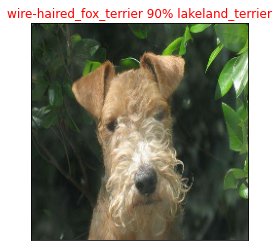

In [46]:
plot_pred(prediction_probabilities=predictions, labels=val_labels, images=val_images, n=23)

Now we've got one function to visualize our models top prediciton , let's make another to view our models top 10 prediciotions

This function will:
* Take an input of prediction probabilitie array and a ground truth array and an integer
*  Find the prediction using 'get_pred_label()'
* Find the top 10:
    * Prediction probabilitirs indexes
    * Prediction probabilities values
    * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green

In [47]:
def plot_pred_conf(prediciton_probabilities, labels, n=1):
    '''
    Plus the top 10 highest prediction configdences along wth the truth label for sample n.
    '''
    pred_prob, true_label = prediciton_probabilities[n], labels[n]

    # Get the predicted label
    pred_label = get_pred_label(pred_prob)

    # Find the top 10 prediciton confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

    # Find the top 10 prediciton confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]

    # Find the top 10 prediciton labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]

    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                                    top_10_pred_values,
                                    color='grey')
    plt.xticks(np.arange(len(top_10_pred_labels)),
                labels=top_10_pred_labels,
                rotation="vertical")

    # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
    else:
        pass


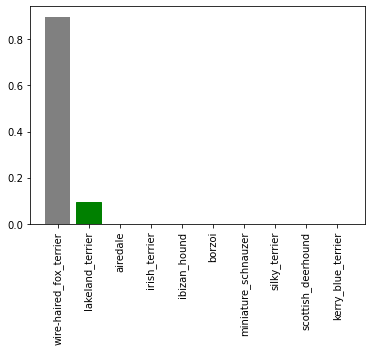

In [48]:
plot_pred_conf(prediciton_probabilities=predictions, labels=val_labels, n=23)

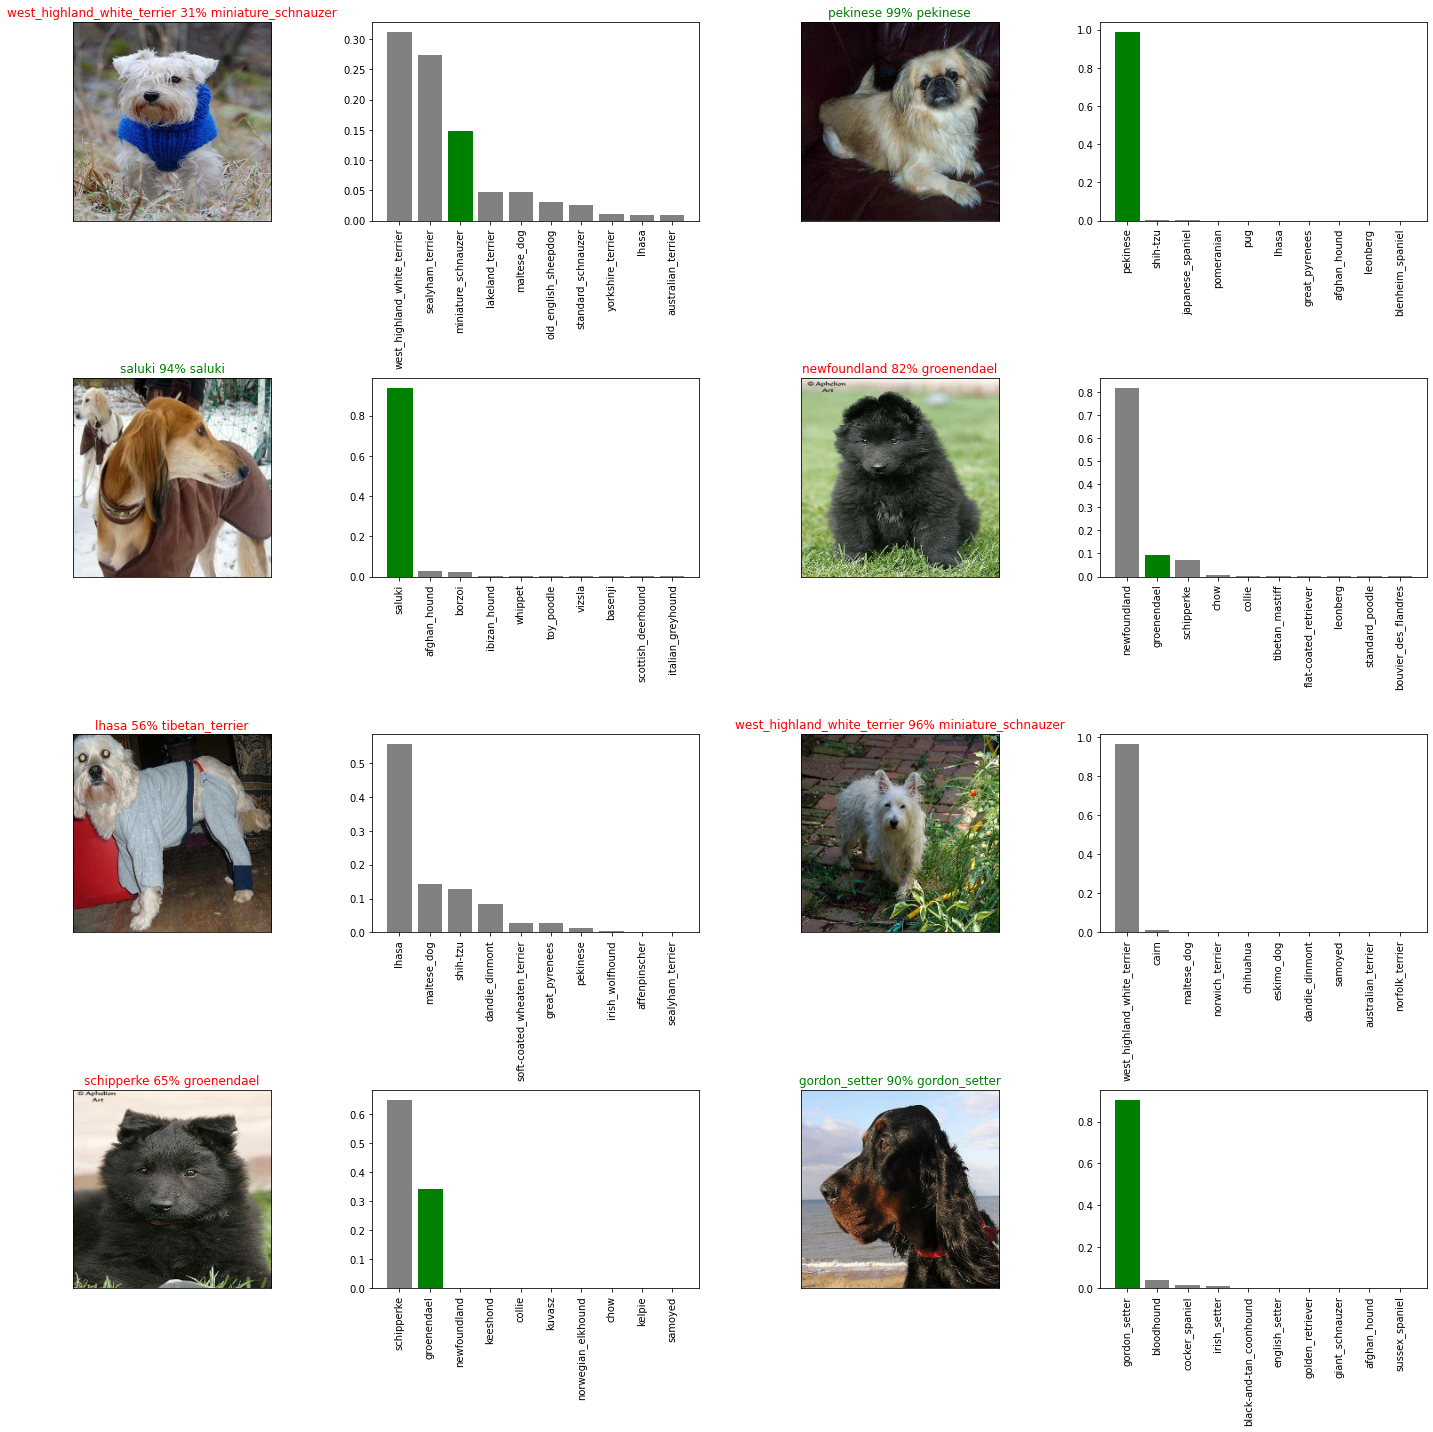

In [49]:
#Now we've got some funciton to help us visualise predicitons and evaluate our model, let's check out a few.
i_multiplier = 40
num_rows = 4
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediciton_probabilities=predictions,
                    labels=val_labels,
                    n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

# Saving and reloading a trained model

In [50]:
# Create a function to save a model
def save_model(model, suffix=None):
    '''
    Saves a given models directory and appends a suffix (string).
    '''
    # Create a model directory pathname with current time
    modeldir = os.path.join('models', datetime.datetime.now().strftime("%Y%m%d-%H%m"))
    model_path = modeldir + "-" + suffix + ".h5" # save format for models
    print(f"saving model to: {model_path}...")
    model.save(model_path)
    return model_path

In [51]:
# Create a function to load a trained model
def load_model(model_path):
    '''
    Loads a saved model from a specified path.
    '''
    print(f"Loading saved model from: {model_path}")
    model = tf.keras.models.load_model(model_path,
                                        custom_objects={"KerasLayer": hub.KerasLayer})

    return model

Now we've got functions to save and load a trained model, let's make sure they work!

In [52]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv5-Adam")

saving model to: models\20210507-1205-1000-images-mobilenetv5-Adam.h5...


'models\\20210507-1205-1000-images-mobilenetv5-Adam.h5'

In [53]:
# Load a trained model
loaded_model = load_model(r"U:\Coding\~Learning\Pd\dog-breed-identification\models\20210506-1405-1000-images-mobilenetv5-Adam.h5")

Loading saved model from: U:\Coding\~Learning\Pd\dog-breed-identification\models\20210506-1405-1000-images-mobilenetv5-Adam.h5


In [54]:
# Evaluate the pre-saved model
model.evaluate(valid_data)

13/13 [==============================] - 0s 33ms/step - loss: 0.7854 - accuracy: 0.7925


[0.7854312062263489, 0.7925000190734863]

In [55]:
# Evaluate the loade modle
loaded_model.evaluate(valid_data)

13/13 [==============================] - 1s 32ms/step - loss: 0.8767 - accuracy: 0.7375


[0.8767108917236328, 0.737500011920929]

# Training a big dog model (on the full data) 🐩

In [56]:
len(X_train), len(y_train)

(1600, 1600)

In [57]:
# Create a databatch with the full dataset
full_data = create_data_batches(X, y)

Creating training data batches...


In [58]:
# Create a model for full model
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [59]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validateion set when training on all the data, so we  can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)


## **Note:** Running the cell below will take a little whle  (maybe up to 30 minutes on Gogle collab) because the GPU we're using in the runtime has to load all of the images into memory.

In [60]:
# Fit the full model on the full data
full_model.fit(x=full_data, epochs=NUM_EPOCHS, callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 24s 66ms/step - loss: 1.3330 - accuracy: 0.6685
Epoch 2/100
320/320 [==============================] - 11s 34ms/step - loss: 0.4090 - accuracy: 0.8806
Epoch 3/100
320/320 [==============================] - 11s 34ms/step - loss: 0.2382 - accuracy: 0.9351
Epoch 4/100
320/320 [==============================] - 11s 33ms/step - loss: 0.1553 - accuracy: 0.9631
Epoch 5/100
320/320 [==============================] - 11s 33ms/step - loss: 0.1077 - accuracy: 0.9789
Epoch 6/100
320/320 [==============================] - 11s 33ms/step - loss: 0.0789 - accuracy: 0.9855
Epoch 7/100
320/320 [==============================] - 11s 33ms/step - loss: 0.0587 - accuracy: 0.9914
Epoch 8/100
320/320 [==============================] - 11s 33ms/step - loss: 0.0460 - accuracy: 0.9933
Epoch 9/100
320/320 [==============================] - 11s 33ms/step - loss: 0.0376 - accuracy: 0.9965
Epoch 10/100
320/320 [==============================] - 11s 34ms/step - l

In [61]:
save_model(full_model, suffix='full-image-set-mobilenetv5-adam')

saving model to: models\20210507-1205-full-image-set-mobilenetv5-adam.h5...


'models\\20210507-1205-full-image-set-mobilenetv5-adam.h5'

In [62]:
# Load in the full model
loaded_full_model = load_model(r"U:\Coding\~Learning\Pd\dog-breed-identification\models\20210506-1505-full-image-set-mobilenetv5-adam.h5")

Loading saved model from: U:\Coding\~Learning\Pd\dog-breed-identification\models\20210506-1505-full-image-set-mobilenetv5-adam.h5


### Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predicitons on the tes tdata, we'll have to get it into the same format

Luckily we created 'create_data_batches()' earlier which can take a list of filenames as input and conver them into Tensor batches.

To make prections on the test data, we'll:

* Get the test image filenames
* Convert the filenames into test data batches using 'create_data_batches' and setting the 'test_data' parameter to 'True' (since the test data doesn't gave labels)
* Make a predictions array by passing the test batches to the `predict()` method called on our model


In [63]:
# Load test image filenames
test_path = './test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
print(len(test_filenames))
print(test_filenames[:10])

10357
['./test/000621fb3cbb32d8935728e48679680e.jpg', './test/00102ee9d8eb90812350685311fe5890.jpg', './test/0012a730dfa437f5f3613fb75efcd4ce.jpg', './test/001510bc8570bbeee98c8d80c8a95ec1.jpg', './test/001a5f3114548acdefa3d4da05474c2e.jpg', './test/00225dcd3e4d2410dd53239f95c0352f.jpg', './test/002c2a3117c2193b4d26400ce431eebd.jpg', './test/002c58d413a521ae8d1a5daeb35fc803.jpg', './test/002f80396f1e3db687c5932d7978b196.jpg', './test/0036c6bcec6031be9e62a257b1c3c442.jpg']


In [64]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


** Note **: Calling `predict` on our full model and passing it the test data batch will take a long time to run (~1hour)

In [65]:
# Make predicitons an test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data, verbose=1)

324/324 [==============================] - 10s 30ms/step


In [66]:
test_predictions.shape

(10357, 120)

# Making prediction on custom images

To make predictios on custom images, we'll:
* Get the filepaths of  our own images.
* Turn the filepaths into data batches using `create_data_batches()`. And sisnce our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom image daa batch to our model's `predect()` method.
* Convert the prediction output probabilities to predicitons labels.
* Compare the predicted labels to the custom images.

In [75]:
# Get custom image filepaths 
custom_dir_path = r"U:/Downloads/dogs/"
custom_image_paths = [custom_dir_path + fname for fname in os.listdir(custom_dir_path)]

In [76]:
custom_image_paths

['U:/Downloads/dogs/DLx_LDIX0AItTd7-1.jpg',
 'U:/Downloads/dogs/images.jpg',
 'U:/Downloads/dogs/_117090286_mediaitem117090284.jpg']

In [77]:
# Turn custom images into batches
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches...


In [78]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [79]:
# Get custom image prediciton labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['chihuahua', 'black-and-tan_coonhound', 'bluetick']

In [80]:
# Get custom images (our unbathify() function won't work since there aren't labels...)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

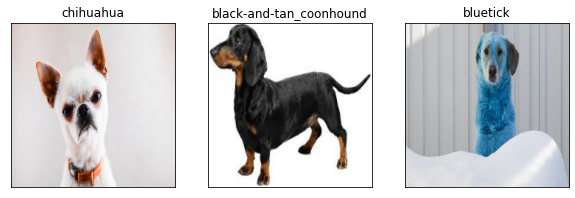

In [81]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
    plt.subplot(1, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)